In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import requests as rt
import statsmodels.api as sm                
import statsmodels.stats.api as sms 
import scipy.stats as stats



import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import re#, wget, os
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing



import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split # cargamos el metodo

#Arbol de decision
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix


class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
print(color.BOLD + 'Hello world Autocity !' + color.END)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Hello world Autocity !


**`TRABAJO PRACTICO 2`**

Problema General:

Objetivo General:


# **A) Análisis Descriptivo**

**A) Análisis Descriptivo**

*Descripción del problema*: No se tiene identificado las caracteristicas de la cartera de clientes del banco.

*hipótesis de trabajo*: 
                        (a)Se cree que los clientes con mayor cantidad de tarjetas de creditos NO son necesariamente los de mayor ingreso y en actividad laboral plena.

 (b) Se cree que existe ante menos cantidad de ingreso al caer en deuda este tiene una relación inversa haciendo aumentar la clasificación de deudor ante el banco central. 


In [ ]:


# 1. Url que nos da Drive para compartir
url1 = 'https://drive.google.com/file/d/1BtM9aBdQCikHtWjdOmCcF33HIME-d1yL/view?usp=sharing'

# 2. Tomamos el id de la url, mediante la funcion split
bi = 'https://drive.google.com/uc?export=download&id=' + url1.split('/')[-2]

## Dataframe

In [ ]:
#Levantados la base que vamos a trabajar.
data_pura = bi
data = pd.read_csv(data_pura)
data.head()   

,id,ANTIGÜEDAD,SALDO_TOTAL,SALDO_RESUMEN,CANT_TARJETAS,EDAD,ESTADO_CIVIL,SEXO,CUENTA_BASICA,INGRESOS_NETOS,MAXIMA_MORA,ENDEUDAMIENTO,SIT_MAYOR1,SEGMENTO,SITUACION,DIRTY
0,1,78,1465.53,1465.53,1,84,Viudo/a,FEMENINO,0,8647.64,11,0.00,0,JUBILADO NACION,1,0
1,2,102,31104.20,8184.04,1,75,Viudo/a,FEMENINO,0,25330.44,11,0.26,0,JUBILADO NACION,1,0
2,3,51,30274.75,3281.90,1,79,Casado/a,FEMENINO,0,9718.30,7,0.25,0,JUBILADO NACION,0,0
3,4,114,2883.86,2883.86,1,85,Viudo/a,FEMENINO,0,19585.07,6,0.00,0,JUBILADO NACION,0,0
4,5,69,0.00,0.00,1,71,Soltero/a,FEMENINO,0,17472.75,8,0.00,0,JUBILADO NACION,1,0


In [ ]:
data_v2_copia = data.copy(deep=True)

In [ ]:
data['ESTADO_CIVIL'].value_counts()

Soltero/a       3814
Casado/a        1988
Viudo/a          602
Divorciado/a     463
Conviviente       47
Union Civil        3
Name: ESTADO_CIVIL, dtype: int64

In [ ]:
data['ESTADO_CIVIL'] = data['ESTADO_CIVIL'].replace({'Soltero/a': 1}) #Soltero sera 1
data['ESTADO_CIVIL'] = data['ESTADO_CIVIL'].replace({'Casado/a': 2})# Casado 2
data['ESTADO_CIVIL'] = data['ESTADO_CIVIL'].replace({'Viudo/a': 3})# Viudo 3
data['ESTADO_CIVIL'] = data['ESTADO_CIVIL'].replace({'Divorciado/a': 4})#Divorciado 4
data['ESTADO_CIVIL'] = data['ESTADO_CIVIL'].replace({'Conviviente': 5})# Conviviente 5
data['ESTADO_CIVIL'] = data['ESTADO_CIVIL'].replace({'Union Civil': 6})# Union Civil 6
data['SEXO'] = data['SEXO'].replace({'FEMENINO':1}) #Identificamos al sexo femenino como 1
data['SEXO'] = data['SEXO'].replace({'MASCULINO':2})#Identificamos al sexo femenino como 2
# Transformamos la variable Segmento



data['SEGMENTO'] = data['SEGMENTO'].replace({'JUBILADO NACION':1})
data['SEGMENTO'] = data['SEGMENTO'].replace({'CONVENIO':2})
data['SEGMENTO'] = data['SEGMENTO'].replace({'META4':3})
data['SEGMENTO'] = data['SEGMENTO'].replace({'JUBILADO PROVIN': 4})
data['SEGMENTO'] = data['SEGMENTO'].replace({'INDEFINIDOS':5})
data['SEGMENTO'] = data['SEGMENTO'].replace({'EMPLEADO BPC':6})
data['ESTADO_CIVIL'].value_counts() #Controlamos que mantengan la misma frecuencia 

1    3814
2    1988
3     602
4     463
5      47
6       3
Name: ESTADO_CIVIL, dtype: int64

### Exploración del dataframe

In [ ]:
data.columns

Index(['id', 'ANTIGÜEDAD', 'SALDO_TOTAL', 'SALDO_RESUMEN', 'CANT_TARJETAS',
       'EDAD', 'ESTADO_CIVIL', 'SEXO', 'CUENTA_BASICA', 'INGRESOS_NETOS',
       'MAXIMA_MORA', 'ENDEUDAMIENTO', 'SIT_MAYOR1', 'SEGMENTO', 'SITUACION',
       'DIRTY'],
      dtype='object')

In [ ]:
data.info()# Identificamos las variables que contiene el dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6917 entries, 0 to 6916
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              6917 non-null   int64  
 1   ANTIGÜEDAD      6917 non-null   int64  
 2   SALDO_TOTAL     6917 non-null   float64
 3   SALDO_RESUMEN   6917 non-null   float64
 4   CANT_TARJETAS   6917 non-null   int64  
 5   EDAD            6917 non-null   int64  
 6   ESTADO_CIVIL    6917 non-null   int64  
 7   SEXO            6917 non-null   int64  
 8   CUENTA_BASICA   6917 non-null   int64  
 9   INGRESOS_NETOS  6917 non-null   float64
 10  MAXIMA_MORA     6917 non-null   int64  
 11  ENDEUDAMIENTO   6917 non-null   float64
 12  SIT_MAYOR1      6917 non-null   int64  
 13  SEGMENTO        6917 non-null   int64  
 14  SITUACION       6917 non-null   int64  
 15  DIRTY           6917 non-null   int64  
dtypes: float64(4), int64(12)
memory usage: 864.8 KB


In [ ]:
print(color.BOLD +"El dataframe es de tamaño"+ color.END)
print(color.PURPLE +"6917 Filas"+ color.PURPLE)
print(color.BLUE +"16 Columnas o datos"+ color.PURPLE)
data.shape


El dataframe es de tamaño
6917 Filas
16 Columnas o datos


(6917, 16)

***Tipos de datos***

ANTIGÜEDAD: Variable Cuantitativa.

SALDO_TOTAL: Variable Cuantitativa.

SALDO_RESUMEN: Variable Cuantitativa.

CANT_TARJETAS: Variable Cuantitativa.

EDAD: Variable Cuantitativa.

ESTADO_CIVIL: Variable Cualitativa.

SEXO: Variable Cualitativa.

CUENTA_BASICA: Variable Cuantitativa.

INGRESOS_NETOS: Variable Cuantitativa.

MAXIMA_MORA: Variable Cuantitativa.

ENDEUDAMIENTO: Variable Cuantitativa.

SIT_MAYOR1: Variable Cualitativa.

SEGMENTO: Variable Cualitativa.

SITUACION: Variable Cuantitativa.

DIRTY: Variable Cuantitativa.

## Análisis de campos-variables

### Estado Civil

In [ ]:

estadocivil_fa = data['ESTADO_CIVIL'].value_counts()
estadocivil_fa = estadocivil_fa.to_frame().reset_index()
estadocivil_fa.columns = ['Estado Civil','FA']
estadocivil_fr = round(100*(data['ESTADO_CIVIL'].value_counts()/len(data['ESTADO_CIVIL'])),2)
estadocivil_fr = estadocivil_fr.to_frame().reset_index()
estadocivil_fr.columns = ['Estado Civil','FR']

estadocivil1 = pd.merge(estadocivil_fa,estadocivil_fr)

fa = estadocivil1['FA'].values

a = []
b = 0
for c in fa:
    b = b + c
    a.append(b)
    
estadocivil1['FAA'] = a

fr = estadocivil1['FR'].values

d = []
e = 0
for f in fr:
    e = e + f
    d.append(e)

print(color.PURPLE+ color.UNDERLINE+ "FrecuenciaS de Estado Civil"+color.END)
print("")
print(color.GREEN+ "Se logra identificar por medio del analisis descriptivo que más del 50% de la población atendida es soltero/a."+color.END)
print("")
estadocivil1['FRA'] = d
estadocivil1

FrecuenciaS de Estado Civil

Se logra identificar por medio del analisis descriptivo que más del 50% de la población atendida es soltero/a.



,Estado Civil,FA,FR,FAA,FRA
0,1,3814,55.14,3814,55.14
1,2,1988,28.74,5802,83.88
2,3,602,8.70,6404,92.58
3,4,463,6.69,6867,99.27
4,5,47,0.68,6914,99.95
5,6,3,0.04,6917,99.99


Se logra visualizar en el grafico de  barras que la categoria Sortero/a casi duplica las cantidades y por ende porcentualmente 
 a su categoria siguiente de significatividad como es así casados


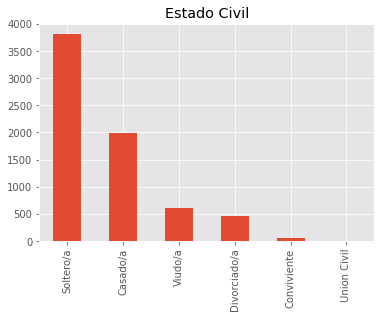

In [ ]:
print(color.GREEN+ 'Se logra visualizar en el grafico de  barras que la categoria Sortero/a casi duplica las cantidades y por ende porcentualmente \n a su categoria siguiente de significatividad como es así casados'+color.END)

grafico = data_v2_copia['ESTADO_CIVIL'].value_counts().plot(kind='bar', title='Estado Civil')

In [ ]:

media = np.mean(data['ESTADO_CIVIL'])
desv = np.std(data['ESTADO_CIVIL'],ddof=1)
n= len(data['ESTADO_CIVIL'])

#conf_interval = stats.norm.interval(confidence, loc=media, scale=desv)
#print(conf_interval)


In [ ]:
#st.t.interval(0.95,len(data['ESTADO_CIVIL'])-1, loc=np.mean(data['ESTADO_CIVIL']), scale=st.sem(data['ESTADO_CIVIL']))

In [ ]:
#st.norm.interval(0.95, loc=np.mean(data['ESTADO_CIVIL']), scale=st.sem(data['ESTADO_CIVIL']))

In [ ]:
#conf_interval = stats.norm.interval(x, loc=media, scale=desv)
#print(conf_interval)

In [ ]:
x_=np.mean(data['ESTADO_CIVIL'])
s = np.std(data['ESTADO_CIVIL'],ddof=0)
M=1.6916293190689606
Sx=15
n=len(data['ESTADO_CIVIL'])
z=(x_-M)/(Sx/np.sqrt(n))
print(x_)
print(s)
print(n)
print(z)

1.6916293190689606
0.9376426950396975
6917
0.0


### Sexo

In [ ]:
##Exploramos las variables: Sexo
sexo_fa = data['SEXO'].value_counts()
sexo_fa = sexo_fa.to_frame().reset_index()
sexo_fa.columns = ['Sexo','FA']

sexo_ra = round(100*(data['SEXO'].value_counts()/len(data['SEXO'])),2)
sexo_ra = sexo_ra.to_frame().reset_index()
sexo_ra.columns = ['Sexo', 'FR']


print(color.PURPLE+ color.UNDERLINE+ "Segmentación por sexo"+color.END)
print("")
print(color.GREEN+ "La segmentación muestra una asignación con un alto nivel de homogeneidad entre sexos."+color.END)
print("")

sexo = pd.merge(sexo_fa,sexo_ra)
sexo

Segmentación por sexo

La segmentación muestra una asignación con un alto nivel de homogeneidad entre sexos.



,Sexo,FA,FR
0,1,3881,56.11
1,2,3036,43.89


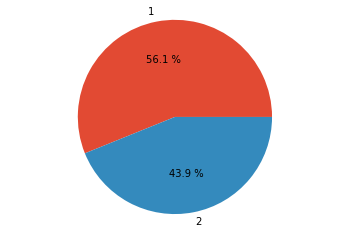

In [ ]:
plt.pie(sexo['FR'], labels=sexo['Sexo'], autopct="%0.1f %%")
plt.axis("equal")
plt.show()

### Segmento

In [ ]:


segmento_fa = data['SEGMENTO'].value_counts()
segmento_fa = segmento_fa.to_frame().reset_index()
segmento_fa.columns = ['Segmento','FA']

segmento_ra = round(100*(data['SEGMENTO'].value_counts()/len(data['SEGMENTO'])),2)
segmento_ra = segmento_ra.to_frame().reset_index()
segmento_ra.columns = ['Segmento', 'FR']

print(color.PURPLE+ color.UNDERLINE+ "Segmentos de clientes"+color.END)
print("")
print(color.GREEN+ 'Los clientes del banco el 34,16% pertenecen al segmento META4 y el 27,28% al convenio, acumulando así el 61,44 de la cartera de clientes.'+color.END)

print("")

segmento = pd.merge(segmento_fa,segmento_ra)
segmento


Segmentos de clientes

Los clientes del banco el 34,16% pertenecen al segmento META4 y el 27,28% al convenio, acumulando así el 61,44 de la cartera de clientes.



,Segmento,FA,FR
0,3,2363,34.16
1,2,1887,27.28
2,4,1362,19.69
3,1,1147,16.58
4,5,81,1.17
5,6,77,1.11


In [ ]:
segmentos_ingresos_promedio = data.groupby('SEGMENTO')['INGRESOS_NETOS'].mean()
segmentos_ingresos_promedio = segmentos_ingresos_promedio.to_frame().reset_index()
segmentos_ingresos_promedio.columns = ['Segmento','Ingresos Netos']

print(color.PURPLE+ color.UNDERLINE+ "Segmentos de clientes e ingreso promedio"+color.END)
print()
print(color.GREEN+ "Entendiendo que a pesar de ser el segmento con mayor ingreso promedio los empleados del banco de cordoba, \n nos interesa análizar que el segmento META4 es uno de los de mayor ingreso en promedio y CONVENIO uno de los de menor ingreso. "+color.END)
print()
segmentos_ingresos_promedio

Segmentos de clientes e ingreso promedio

Entendiendo que a pesar de ser el segmento con mayor ingreso promedio los empleados del banco de cordoba, 
 nos interesa análizar que el segmento META4 es uno de los de mayor ingreso en promedio y CONVENIO uno de los de menor ingreso. 



,Segmento,Ingresos Netos
0,1,16172.572363
1,2,29715.410371
2,3,43797.278502
3,4,45107.970272
4,5,15918.752469
5,6,53975.283117


In [ ]:
segmentos_cant_promedio = data.groupby('SEGMENTO')['CANT_TARJETAS'].sum()
segmentos_cant_promedio = segmentos_cant_promedio.to_frame().reset_index()
segmentos_cant_promedio.columns = ['Segmento','Tarjetas']
datav2 = data


In [ ]:
datav2.columns

Index(['id', 'ANTIGÜEDAD', 'SALDO_TOTAL', 'SALDO_RESUMEN', 'CANT_TARJETAS',
       'EDAD', 'ESTADO_CIVIL', 'SEXO', 'CUENTA_BASICA', 'INGRESOS_NETOS',
       'MAXIMA_MORA', 'ENDEUDAMIENTO', 'SIT_MAYOR1', 'SEGMENTO', 'SITUACION',
       'DIRTY'],
      dtype='object')

In [ ]:
Semento_td = pd.merge(segmentos_ingresos_promedio,segmentos_cant_promedio)
Semento_td = pd.merge(Semento_td,segmento)
Semento_td

,Segmento,Ingresos Netos,Tarjetas,FA,FR
0,1,16172.572363,1092,1147,16.58
1,2,29715.410371,2098,1887,27.28
2,3,43797.278502,2765,2363,34.16
3,4,45107.970272,1625,1362,19.69
4,5,15918.752469,83,81,1.17
5,6,53975.283117,136,77,1.11


### Antiguedad

{'boxes': [<matplotlib.lines.Line2D at 0x7fe523c6ce50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe523c72e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe523c78ed0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe523c78990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe523c72410>,
  <matplotlib.lines.Line2D at 0x7fe523c72950>]}

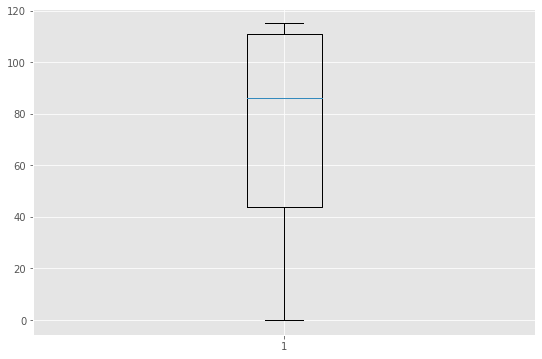

In [ ]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(datav2['ANTIGÜEDAD'])


### Ingresos Netos

{'boxes': [<matplotlib.lines.Line2D at 0x7fe523be6450>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe523bea4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe523bf1510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe523beaf90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe523be6a10>,
  <matplotlib.lines.Line2D at 0x7fe523be6f50>]}

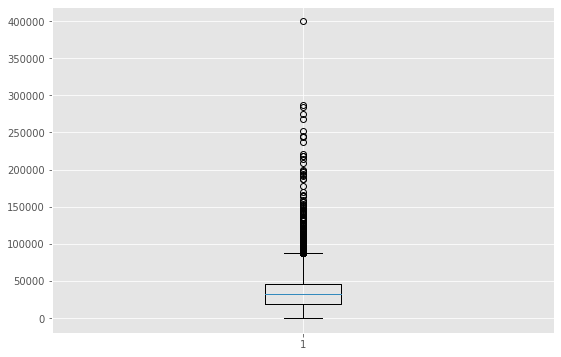

In [ ]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(datav2['INGRESOS_NETOS'])

In [ ]:
Q1 = datav2.INGRESOS_NETOS.quantile(0.05)
Q3 = datav2.INGRESOS_NETOS.quantile(0.95)
IQR = Q3 - Q1

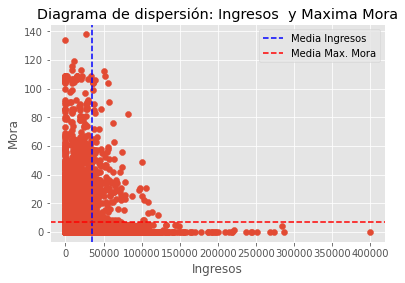

In [ ]:
plt.scatter(datav2["INGRESOS_NETOS"], datav2["MAXIMA_MORA"])
plt.title("Diagrama de dispersión: Ingresos  y Maxima Mora")
plt.axvline(datav2["INGRESOS_NETOS"].mean(), color='blue', linestyle='--', label='Media Ingresos')
plt.axhline(datav2["MAXIMA_MORA"].mean(), color='red',linestyle='--', label='Media Max. Mora')
plt.xlabel("Ingresos")
plt.ylabel("Mora")
plt.legend()
plt.show()

# B) Análisis Multivariado 

## Interpretacion

**A) Análisis Multivariado**

*Descripción del problema*: Realizamos un analisis de correlaciones para obtener las mejores variables para trabajar.

*Objetivo de trabajo*: 
                        
(a)Se busca poder segmentar los clientes segun los datos que tenemos, para esto necesitamos realizar una clusterizacion en donde el metodo utilizado es **Kmeans**, para encontrar cual es la mejor forma de clusterizarlos utilizando el metodo de **Codo de jambu**.

 (b) Una vez clusterizados intentamos representarlos graficamente y al no poderlo hacer en 7 dimensiones aplicamos el Método de **Componentes principales** para reducir a 3 componentes y poder hacerlo en un grafico de 3D.

 (c) Nos proponemos entrenar un **Arbol de decision** para poder clasificar con la mayor precision posibles futuros buenos clientes. 


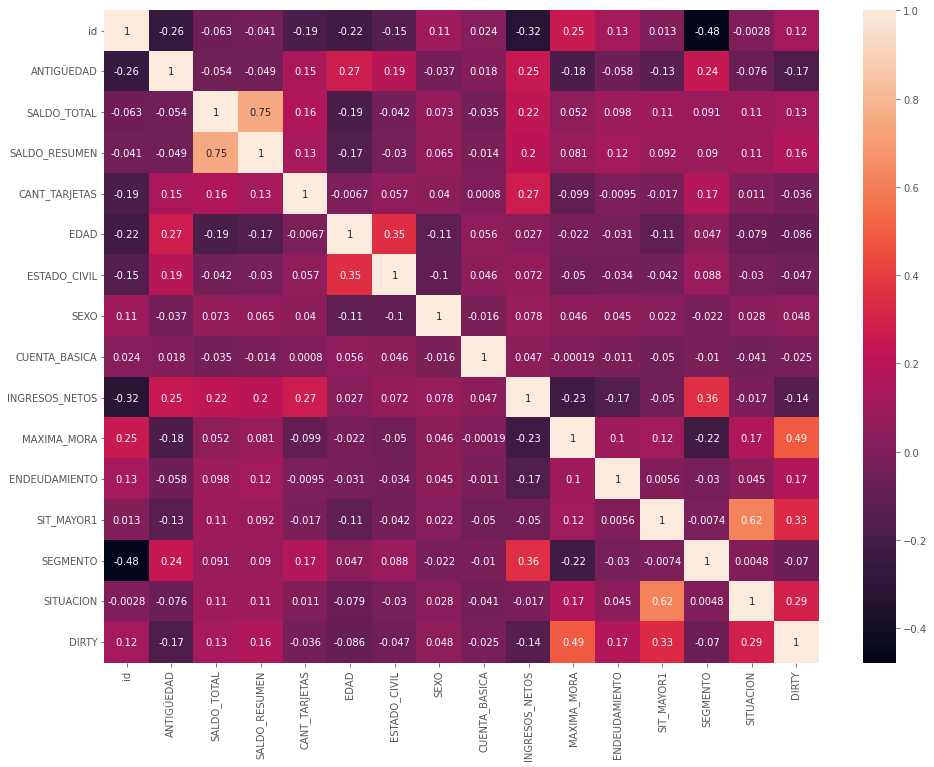

In [ ]:
corr_df = data.corr(method='pearson')

plt.figure(figsize=(16, 12))
sns.heatmap(corr_df, annot=True)
plt.show()

### variables correlacionadas      
(a) grupo de Saldos totales y de resumenes  
(b) Edad y estado civil  
(c) SITUACION, SIT_MAYOR1 Y DIRTY  

In [ ]:
df_variables = data[['ANTIGÜEDAD','SALDO_TOTAL', 'CANT_TARJETAS', 'EDAD', 'INGRESOS_NETOS', 'ENDEUDAMIENTO']]
df = df_variables

Normalizo las variables ya que todas trabajan con distintas unidades y armo el dataframe para poder trabajar.

In [ ]:
#normalizo las variables entre 0 y 1 y selecciono las columnas a trabajar
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
attributes_n=scaler.fit_transform(df)
attributes_n
df1 = pd.DataFrame(attributes_n)
df1.columns = ['ANTIGÜEDAD','SALDO_TOTAL', 'CANT_TARJETAS', 'EDAD', 'INGRESOS_NETOS', 'ENDEUDAMIENTO']
df1.describe()

,ANTIGÜEDAD,SALDO_TOTAL,CANT_TARJETAS,EDAD,INGRESOS_NETOS,ENDEUDAMIENTO
count,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000
mean,0.654326,0.060706,0.375837,0.420786,0.088647,0.002859
std,0.313432,0.066920,0.167653,0.194568,0.065525,0.023376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.382609,0.015773,0.333333,0.263158,0.047391,0.000001
50%,0.747826,0.042445,0.333333,0.421053,0.081236,0.000003
75%,0.965217,0.084386,0.333333,0.578947,0.115818,0.000006
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Codo de jambu

Encuentro cual es el mejor numero de cluster para aplicar K-means a travez del metodo **Codo de Jambu**

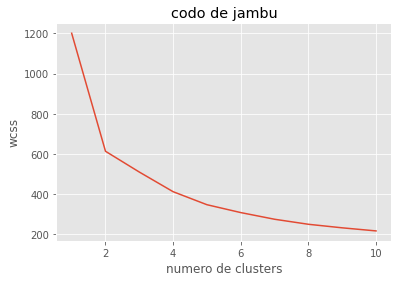

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , max_iter = 300)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("codo de jambu")
plt.xlabel('numero de clusters')
plt.ylabel('wcss')
plt.show()

Aca podemos observar el codo en 2 clusters.

## K-means

In [ ]:
clustering = KMeans(n_clusters = 2, max_iter = 300) #crea modelo
clustering.fit(df1) #aplica model a la base de datos
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,random_state=None, tol=0.0001, verbose=0)
df['KMeans_clusters']= clustering.labels_
df['KMeans_clusters'].value_counts()

0    3788
1    3129
Name: KMeans_clusters, dtype: int64

## Metodo de los componentes principales

###Normalizacion de variables







In [ ]:
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal
X_std = StandardScaler().fit_transform(df1)
X_std


array([[ 0.07636891, -0.85744861, -0.25354114,  2.16556927, -1.02265487,
        -0.12232222],
       [ 0.74225733,  0.14881544, -0.25354114,  1.55688791, -0.38539684,
        -0.12215439],
       [-0.67275557,  0.12065474, -0.25354114,  1.82741296, -0.98175726,
        -0.12216084],
       ...,
       [ 0.99196549, -0.55401651,  1.73483084,  0.74531275,  0.8494623 ,
        -0.12213502],
       [-0.1455939 ,  4.41607577,  1.73483084,  0.54241896,  2.56982024,
        -0.1220511 ],
       [ 0.49254917,  1.76795339, -0.25354114, -0.67494377, -1.3529818 ,
         8.37130732]])

###Autovalores y autovectores

In [ ]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)


eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Eigenvectors 
[[-0.49288893  0.37783421 -0.24492913  0.43317356 -0.58142275 -0.16917383]
 [-0.23362979 -0.61197476 -0.14401562  0.43443448  0.33076809 -0.50201859]
 [-0.493991   -0.23272884 -0.15339762  0.12263789  0.19333448  0.79111382]
 [-0.19493334  0.60473396 -0.30730806 -0.06416531  0.68682014 -0.16130869]
 [-0.61381953 -0.14488857  0.17353846 -0.70390635 -0.09575913 -0.25973704]
 [ 0.20899062 -0.20462069 -0.87817114 -0.33013023 -0.1851219  -0.00355713]]
Autovalores en orden descendiente:
1.5635378995143352
1.3658555074002074
1.0202538901005413
0.7768287690166421
0.6831040125213413
0.5912874749460597


### Varianza explicada

Suma de las varianzas explicadas acumuladas
[ 26.05519761  48.81616501  65.81793819  78.76321255  90.14663347
 100.        ]


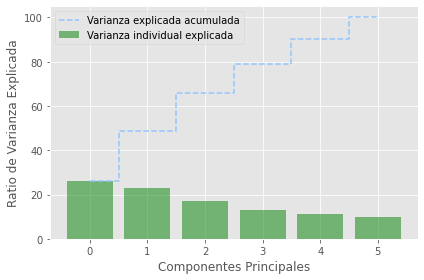

In [ ]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(6), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(6), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()
print('Suma de las varianzas explicadas acumuladas')
print(cum_var_exp)



## Cluster y componentes principales(3D)

Se grafica para demostrar la clusterizacion y representacion por medio de 3 componentes principales en donde se puede notar claramente los dos cumulos de datos.

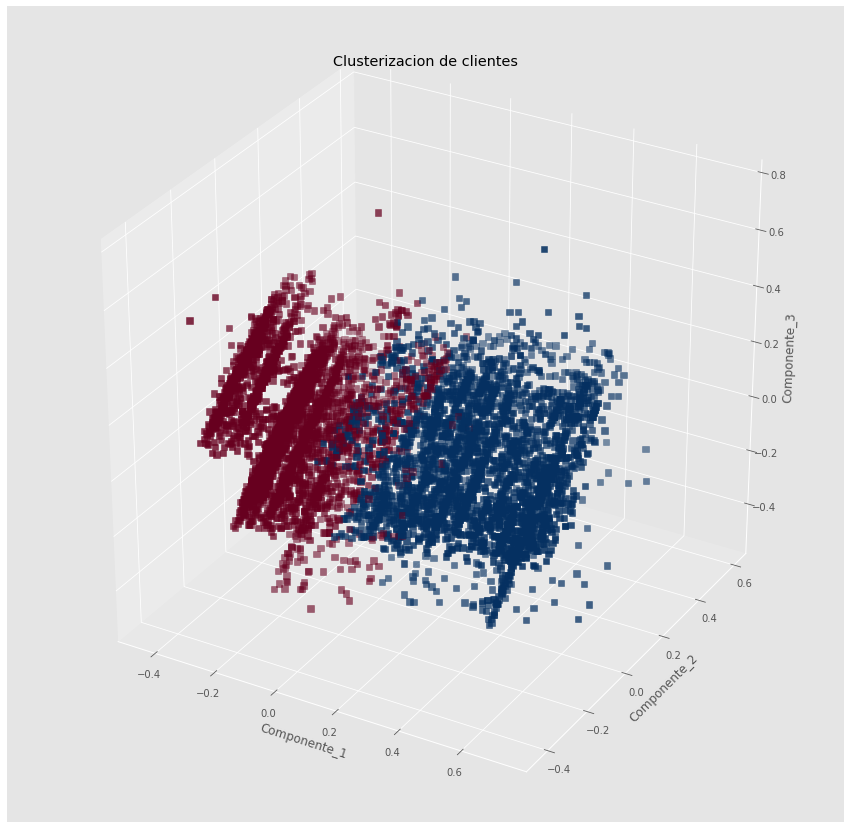

In [ ]:
pca = PCA(n_components=3)
pca_banco = pca.fit_transform(df1)
pca_banco_df = pd.DataFrame(data=pca_banco, columns = ['componente_1','componente_2','componente_3'])
pca_clientes_banco = pd.concat([pca_banco_df, df[['KMeans_clusters']]], axis=1)

fig = plt.figure(figsize=(15,15))


ax = fig.add_subplot(111, projection='3d')
ax.set_title('Clusterizacion de clientes')
x = np.array(pca_clientes_banco['componente_1'])
y = np.array(pca_clientes_banco['componente_2'])
z = np.array(pca_clientes_banco['componente_3'])


ax.scatter(x,y,z, marker="s", c=df["KMeans_clusters"], s=40,cmap="RdBu" )
ax.set_xlabel('Componente_1')
ax.set_ylabel('Componente_2')
ax.set_zlabel('Componente_3')
plt.show()


## Arbol de decision

El objetivo del arbol de decision es poder predecir que tipo de cliente sera segun la variable DIRTY.

1.   features: SALDO_TOTAL, SALDO_RESUMEN, CANT_TARJETAS,
EDAD, CUENTA_BASICA, ENDEUDAMIENTO, SIT_MAYOR1,SEXO,ESTADO_CIVIL',SEGMENTO,MAXIMA_MORA y INGRESOS_NETOS
2.   terget: DIRTY
3.   MAXIMA_MORA Y SIT_MAYOR1 son datos obtenidos por el BCRA



 






### Train y Test

Se toma un 30% de la muestra para test y 70% para train.

In [ ]:
features = data[['SALDO_TOTAL', 'SALDO_RESUMEN', 'CANT_TARJETAS',
       'EDAD', 'CUENTA_BASICA', 'ENDEUDAMIENTO', 'SIT_MAYOR1','SEXO','ESTADO_CIVIL','SEGMENTO','MAXIMA_MORA','INGRESOS_NETOS']]
target = data[['DIRTY']]
 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30) 	
features
data['DIRTY'].value_counts()

0    6243
1     674
Name: DIRTY, dtype: int64

### Modelo

Se prueba el modelo con X_test  y una buena precision para clientes dirty[0] no asi para los clientes dirty[1] asociamos esto a una base de datos pequena en donde el la diferencia de porcentajes entre los dos valores es muy grande.

In [ ]:
## con este arbol de decision podemos predecir la calidad del cliente 


model = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1885
           1       0.45      0.43      0.44       191

    accuracy                           0.90      2076
   macro avg       0.69      0.69      0.69      2076
weighted avg       0.90      0.90      0.90      2076



### Instancia

Podemos corroborar el modelo funcionando, instanciando las variables en el siguiente orden.

In [ ]:

##['SALDO_TOTAL', 'SALDO_RESUMEN', 'CANT_TARJETAS', 'EDAD', 'CUENTA_BASICA', 'ENDEUDAMIENTO', 'SIT_MAYOR1','sexo','civil','segmento','MAXIMA_MORA']

Cliente_nuevo = [80000,5000,1,34,1,10000,2,1,2,3,2,5000]

model.predict([Cliente_nuevo])

array([0])

# C) Modelo econometrico

## Graficos de dispersion

### Endeudamiento/Ingresos netos

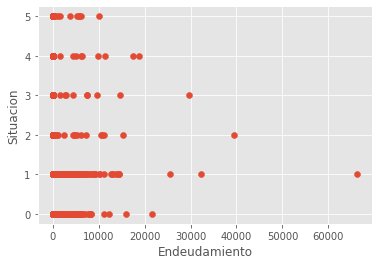

In [ ]:
## Hacemos gráficos de dispersión para observar la variabilidad de 
## cada característica con respecto a Situacion

# Transformamos ingresos netos a su logaritmo
data['INGRESOS_NETOS'] = data['INGRESOS_NETOS'].apply(lambda x: np.log(x) if x != 0 else 0)
plt.scatter(data["ENDEUDAMIENTO"], data["SITUACION"])
plt.xlabel("Endeudamiento")
plt.ylabel("Situacion")
plt.show()

### Ingresos netos/situacion

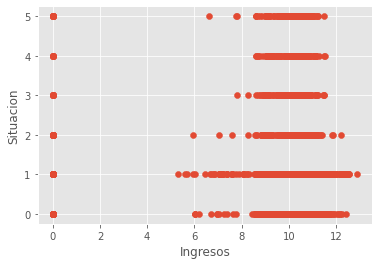

In [ ]:
plt.scatter(data["INGRESOS_NETOS"], data["SITUACION"])
plt.xlabel("Ingresos")
plt.ylabel("Situacion")
plt.show()

### Antiguedad/Situacion

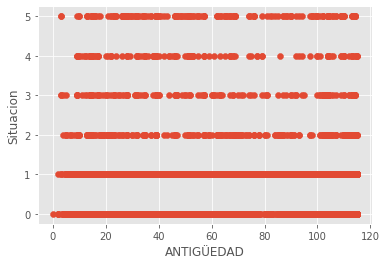

In [ ]:
plt.scatter(data["ANTIGÜEDAD"], data["SITUACION"])
plt.xlabel("ANTIGÜEDAD")
plt.ylabel("Situacion")
plt.show()

### Edad/Situacion

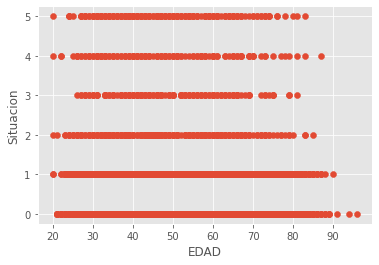

In [ ]:
plt.scatter(data["EDAD"], data["SITUACION"])
plt.xlabel("EDAD")
plt.ylabel("Situacion")
plt.show()

### Ingresos netos

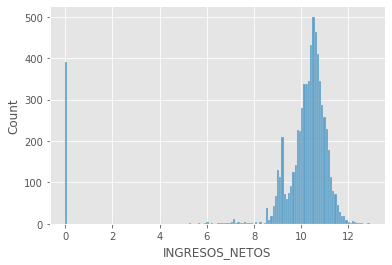

In [ ]:
sns.histplot(data['INGRESOS_NETOS'])

### Antiguedad

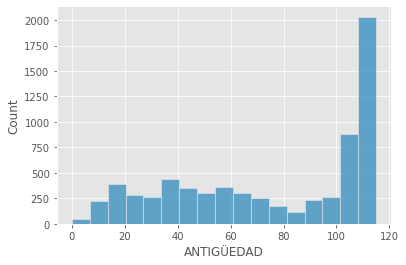

In [ ]:
sns.histplot(data['ANTIGÜEDAD'])

### Edad

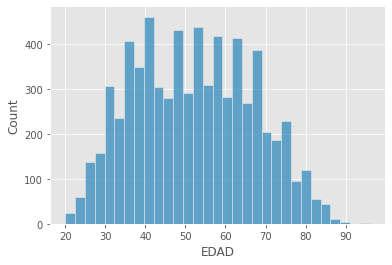

In [ ]:
sns.histplot(data['EDAD'])

## Matriz de correlaciones

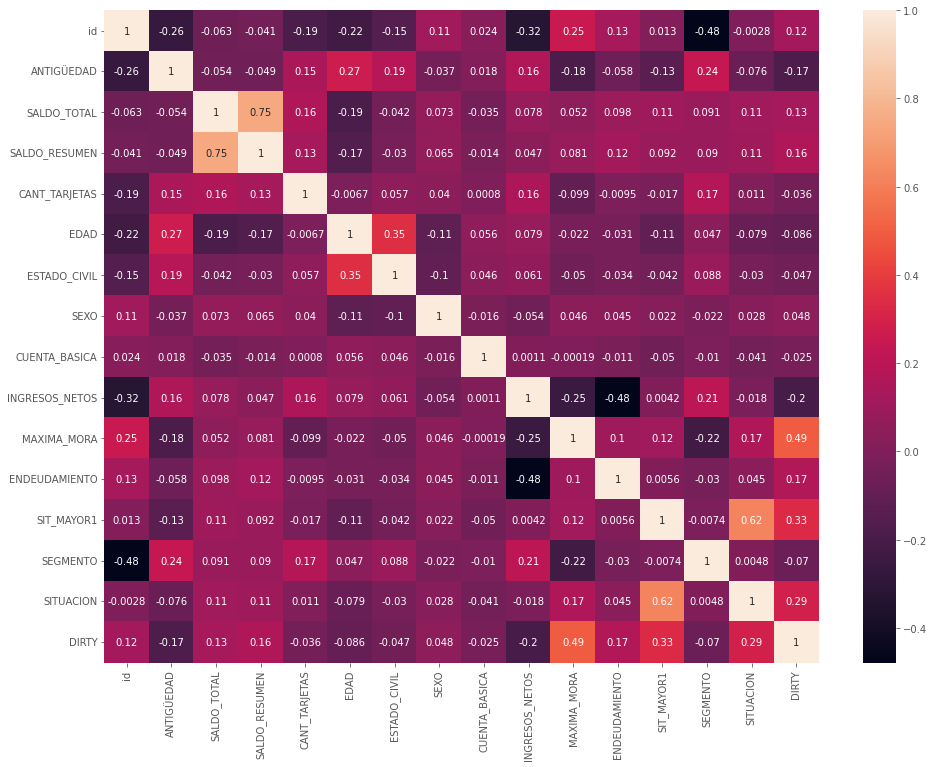

In [ ]:
# Por ultimo chequeamos las correlaciones para evitar multicolinealidad
corr_df = data.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(corr_df, annot=True)
plt.show()

## Regresion Lineal

In [ ]:
#Variable SEXO de object a int

#Defino las variables Y y X para la regresion
Y = data["SITUACION"]
X = data[["ENDEUDAMIENTO","INGRESOS_NETOS", "ANTIGÜEDAD", "EDAD","SEXO"]]

# Vamos a elegir la variable Situación porque dirty nos daría un modelo de probabilidad lineal
# y ya la usamos en el apartado previo. Sit_Mayor1 no la usamos porque tiene muy pocas observaciones
# mayores a cero
#ejecuto la regresion lineal
MiModelo = sm.OLS(Y, sm.add_constant(X))  
Resultados = MiModelo.fit()               
print(Resultados.summary())

                            OLS Regression Results                            
Dep. Variable:              SITUACION   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     16.15
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           7.21e-16
Time:                        18:57:31   Log-Likelihood:                -10248.
No. Observations:                6917   AIC:                         2.051e+04
Df Residuals:                    6911   BIC:                         2.055e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1258      0.085     13.

## Regresion Robusta

In [ ]:
# Realizamos una regresion robusta para evitar los problemas de heterocedasticidad
Resultados_robustos = Resultados.get_robustcov_results()
print(Resultados_robustos.summary())

                            OLS Regression Results                            
Dep. Variable:              SITUACION   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     13.81
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           1.87e-13
Time:                        18:57:31   Log-Likelihood:                -10248.
No. Observations:                6917   AIC:                         2.051e+04
Df Residuals:                    6911   BIC:                         2.055e+04
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.1258      0.089     12.